In [1]:
# Import the necessary libraries

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from os import listdir

In [2]:
# Merging 12 months worth of data into a single file
## Step 1: Get all the files in a List

onlyfiles = [f for f in listdir("D:\Python Projects\Sales Analysis Project\Sales_Data")]

print (onlyfiles)

type(onlyfiles)


['All_Data.csv', 'Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


list

In [3]:
# Merging 12 months worth of data into a single file
## Step 2: Create an empty DataFrame and concat all the 

final_merged = pd.DataFrame()

for f in onlyfiles:
    df = pd.read_csv("D:/Python Projects/Sales Analysis Project/Sales_Data/" + f)
    final_merged = pd.concat([final_merged,df])
                     

## Step 3: Export the o/p in a .csv file format        
all_data = final_merged.to_csv("D:/Python Projects/Sales Analysis Project/Sales_Data/All_Data.csv", index = False)


    

In [4]:
#Examine the concatenated dataframe and run basic statistics on it


final_merged.describe()


    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,931525,931525,931525,931525,931525,931525
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,1775,109515,842760,109515,1775,1775


In [5]:
final_merged.shape

(934250, 6)

In [6]:
final_merged.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
## Data Cleansing (Drop the rows that are Nan)

final_merged = final_merged.dropna()

final_merged.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
#Identify Bad data

temp_dataframe = final_merged[final_merged['Order Date'].str[:2] == 'Or']

temp_dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
# Cleanse the bad data from above step

final_merged = final_merged[final_merged['Order Date'].str[:2] != 'Or']

final_merged.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
## Add a new column corresponding to the month of the Order Date

final_merged['Month'] = final_merged['Order Date'].str[:2].astype('int32')

final_merged.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
## Add a new column corresponding to the Total Amount based on the order date

final_merged['Total Amount'] = pd.to_numeric(final_merged['Quantity Ordered']) * pd.to_numeric(final_merged['Price Each']) 

final_merged.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [12]:
## Which was the best month of sales?

df = final_merged.groupby(['Month']).sum()


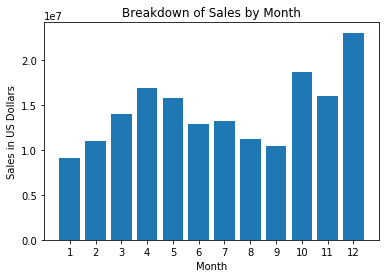

In [13]:
x = range(1,13)

plt.bar(x, df['Total Amount'])
plt.title('Breakdown of Sales by Month')
plt.xticks(x)
plt.xlabel('Month')
plt.ylabel('Sales in US Dollars')

plt.show()

##December was the best month as regards sales is concerned

In [14]:
## 

final_merged.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [15]:
## Which state had the highest number of sales

final_merged['State'] = final_merged['Purchase Address'].str[-8:-6]



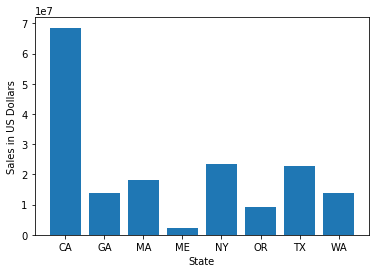

In [16]:
state_sum = final_merged.groupby('State')['Total Amount'].sum()

state_sum

x_state = [state for state, df in final_merged.groupby('State')]


plt.xlabel('State')
plt.ylabel('Sales in US Dollars')
plt.bar(x_state, state_sum)

plt.show()

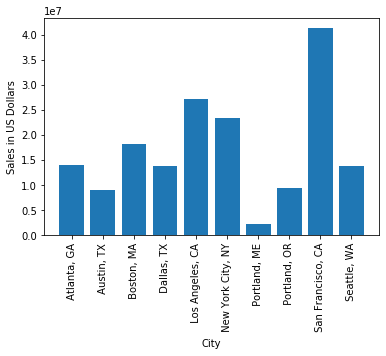

In [17]:
## Which city had the highest number of sales?

##Note: Portland is a city common to the state of Oregon and Maine in our dataset


final_merged['City'] = final_merged['Purchase Address'].apply(lambda x: x.split(',')[1]) + ', ' + final_merged['Purchase Address'].str[-8:-6]

city_sum = final_merged.groupby('City')['Total Amount'].sum()

x_city = [city for city, df in final_merged.groupby('City')]


plt.xlabel('City')
plt.ylabel('Sales in US Dollars')
plt.xticks(rotation = 90)

plt.bar(x_city, city_sum)

plt.show()





## San Francisco (in the state of California) is the city that had the highest sales

In [18]:
final_merged.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Amount,State,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA,"Boston, MA"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA,"Los Angeles, CA"


In [19]:
## Question 4 - What time should we display the advertisement to maximize the likelihood of customer buying the product


final_merged.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Amount,State,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA,"Boston, MA"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA,"Los Angeles, CA"


In [20]:
final_merged['Slot #'] = final_merged['Order Date'].str[-5:-3].astype('int32')

In [21]:
final_merged.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Amount,State,City,Slot #
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX,"Dallas, TX",8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA,"Boston, MA",22
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA,"Los Angeles, CA",14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA,"Los Angeles, CA",14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA,"Los Angeles, CA",9


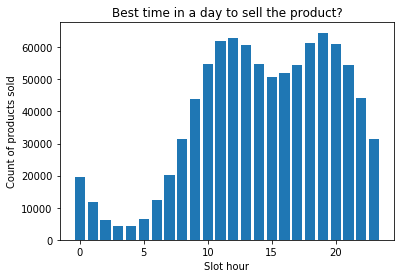

In [22]:
slot = final_merged.groupby('Slot #')['Total Amount'].count()

x_slot = [slot for slot,df in final_merged.groupby('Slot #')]


plt.bar(x_slot, slot)

plt.xlabel('Slot hour')
plt.ylabel('Count of products sold')
plt.title('Best time in a day to sell the product?')

plt.show()



## It is seen that the product sells best during 12:00 PM or 07:00 PM (19:00 HRS)